In [ ]:
#Franklin Wang fmw13 Assignment 12

In [ ]:
#Questions:
#RFE low accuracy
#sns.pairplot(ansur_4feature_df)#you mean 4 feature, right? ansur_df has over 90 features
#Part 3 Q2 and last part of Q3

In [3]:
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns

In [4]:
#Part 1
male = pd.read_csv('ANSUR_II_MALE.csv')
female = pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([male[:100], female[:100]])
ansur_df

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Combat Support,Regular Army,Female,257,1233,274,190,1124,215,160,...,243,375,852,144,734,58.1,1.495,25.995235,Overweight,Small
96,Combat Support,Regular Army,Female,236,1206,277,207,1098,222,177,...,234,365,871,147,721,64.2,1.493,28.801520,Overweight,Small
97,Combat Support,Regular Army,Female,269,1354,321,233,1241,230,185,...,232,357,976,160,809,75.8,1.641,28.148292,Overweight,Normal
98,Combat Support,Regular Army,Female,209,1318,304,225,1213,229,173,...,213,380,933,154,779,68.3,1.607,26.447763,Overweight,Normal


In [5]:
ansur_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 99
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          200 non-null    object 
 1   Component                       200 non-null    object 
 2   Gender                          200 non-null    object 
 3   abdominalextensiondepthsitting  200 non-null    int64  
 4   acromialheight                  200 non-null    int64  
 5   acromionradialelength           200 non-null    int64  
 6   anklecircumference              200 non-null    int64  
 7   axillaheight                    200 non-null    int64  
 8   balloffootcircumference         200 non-null    int64  
 9   balloffootlength                200 non-null    int64  
 10  biacromialbreadth               200 non-null    int64  
 11  bicepscircumferenceflexed       200 non-null    int64  
 12  bicristalbreadth                200 non-nu

In [6]:
ansur_df_numeric = ansur_df.drop(columns = ['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class'], axis=1)

In [4]:
tsne_model = TSNE(learning_rate = 50)
tsne_features = tsne_model.fit_transform(ansur_df_numeric) #what does this do and what does the resulting df represent?
tsne_features.shape

(200, 2)

In [5]:
ansur_df['x'] = tsne_features[:,0]
ansur_df['y'] = tsne_features[:,1]

<Axes: xlabel='x', ylabel='y'>

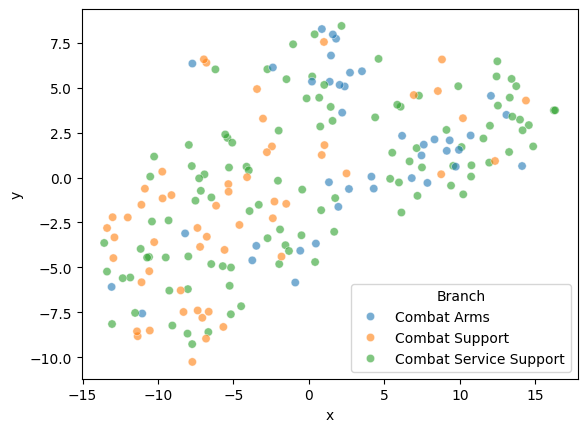

In [6]:
sns.scatterplot(x='x', y='y', hue='Branch', data=ansur_df, alpha=0.6)

<Axes: xlabel='x', ylabel='y'>

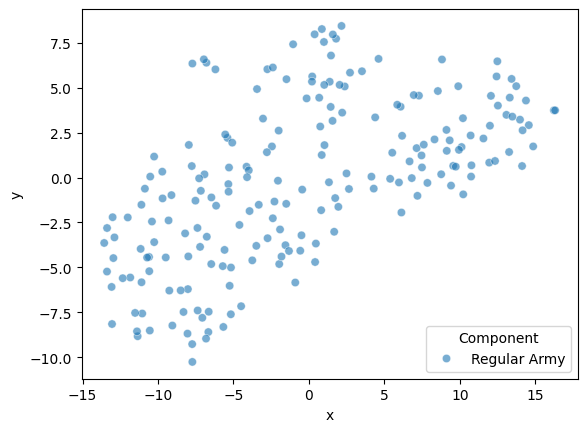

In [7]:
sns.scatterplot(x='x', y='y', hue='Component', data=ansur_df, alpha=0.6)

<Axes: xlabel='x', ylabel='y'>

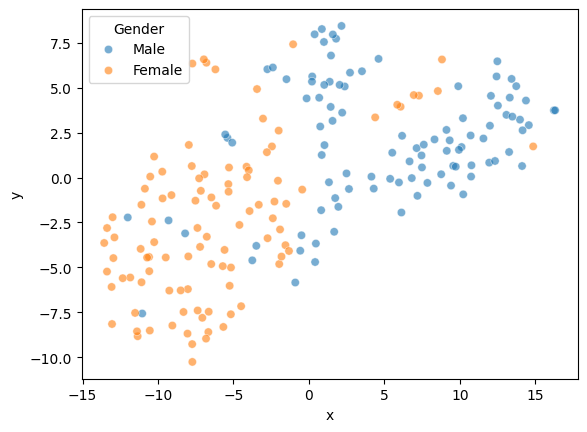

In [8]:
sns.scatterplot(x='x', y='y', hue='Gender', data=ansur_df, alpha=0.6)

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
y = ansur_df['Gender']
X = ansur_df.drop(['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class'], axis=1) 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
#train and test will have the same columns, but the number of rows will differ by the 30% vs 70%
#X has all the columns except Gender, Y has Gender

#for test
print("Observations in test:", X_test.shape[0])

#for train
print("Observations in train:", X_train.shape[0])

print("Features: in X:", X_test.shape[1])

Observations in test: 60
Observations in train: 140
Features: in X: 96


In [8]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

In [13]:
svc= SVC() 
svc.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, svc.predict(X_train)) 
accuracy_test = accuracy_score(y_test, svc.predict(X_test)) 

#print(accuracy_train, "and", accuracy_test)
print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

86.7% accuracy on test set vs. 88.6% on training set


In [14]:
y = ansur_df['Gender']
X = ansur_df[['neckcircumferencebase']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

svc= SVC() 
svc.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, svc.predict(X_train)) 
accuracy_test = accuracy_score(y_test, svc.predict(X_test)) 

#print(accuracy_train, "and", accuracy_test)
print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

91.7% accuracy on test set vs. 93.6% on training set


In [15]:
#Part 2

In [16]:
from sklearn.feature_selection import VarianceThreshold

In [17]:
sel = VarianceThreshold(threshold=.005)
sel.fit(ansur_df_numeric/ansur_df_numeric.mean())
mask = sel.get_support() 
ansur_df_numeric_reduced = ansur_df_numeric.loc[:, mask]
print("Original: ", ansur_df_numeric.shape)
print("Reduced: ", ansur_df_numeric_reduced.shape)

Original:  (200, 94)
Reduced:  (200, 49)


In [18]:
schools_df = pd.read_csv("Public_Schools.csv")

mask = schools_df.isna().sum() / len(schools_df) < .5
print(mask)
print("Original: ", schools_df.shape)
print("Reduced: ", schools_df.loc[:, mask].shape)

#These are both low dimensional datasets 
#because the number of observations (131) is greater than the number of features (19 or 21)

x              True
y              True
objectid_1     True
objectid       True
bldg_id        True
bldg_name      True
address        True
city           True
zipcode        True
csp_sch_id     True
sch_id         True
sch_name       True
sch_label      True
sch_type       True
shared        False
complex       False
label          True
tlt            True
pl             True
point_x        True
point_y        True
dtype: bool
Original:  (131, 21)
Reduced:  (131, 19)


<Axes: >

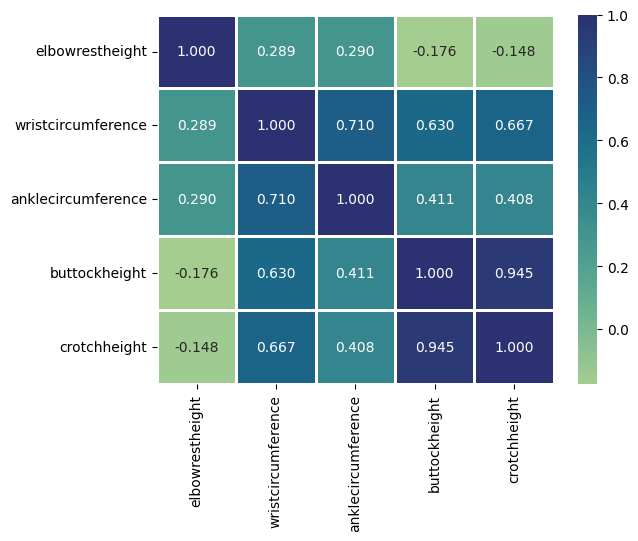

In [19]:
ansur_df_sub = ansur_df[['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']]
corr = ansur_df_sub.corr()
sns.heatmap(corr, cmap='crest', linewidths=1,  annot=True, fmt=".3f")

In [9]:
import numpy as np

In [21]:
corr_abs = ansur_df_numeric.corr().abs()
mask = np.triu(np.ones_like(corr_abs, dtype=bool))
corr_triu = corr_abs.mask(mask) 
corr_triu

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromialheight,0.263631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromionradialelength,0.209260,0.867127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anklecircumference,0.454324,0.535566,0.414022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axillaheight,0.194671,0.991148,0.856546,0.501764,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.419052,0.756985,0.658150,0.709558,0.724471,0.847272,0.763281,0.803603,0.739016,0.041653,...,0.396080,0.420534,0.430994,0.641453,0.646233,NaN,NaN,NaN,NaN,NaN
wristheight,0.316591,0.914189,0.641078,0.550647,0.904469,0.621335,0.709613,0.619630,0.484755,0.220373,...,0.345491,0.333025,0.314389,0.605747,0.791346,0.691079,NaN,NaN,NaN,NaN
weight_kg,0.802423,0.635720,0.547519,0.734699,0.577817,0.679948,0.614191,0.639108,0.896236,0.460424,...,0.803593,0.831981,0.805648,0.681168,0.448621,0.747942,0.630888,NaN,NaN,NaN
stature_m,0.211639,0.980558,0.848956,0.553042,0.979171,0.719529,0.793582,0.772145,0.498324,0.066431,...,0.236113,0.228307,0.222255,0.588619,0.931019,0.785263,0.892793,0.610908,NaN,NaN


In [22]:
to_drop = [c for c in corr_triu.columns if any(corr_triu[c] > .95)]
print(to_drop)
print()

reduced_df = ansur_df_numeric.drop(to_drop, axis=1)

print("Original: ", ansur_df_numeric.shape)
print("Reduced: ", reduced_df.shape)

['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength', 'buttockkneelength', 'cervicaleheight', 'chestheight', 'crotchheight', 'eyeheightsitting', 'forearmcenterofgriplength', 'forearmhandlength', 'handbreadth', 'iliocristaleheight', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'neckcircumference', 'shoulderelbowlength', 'sleeveoutseam', 'suprasternaleheight', 'tibialheight', 'waistbreadth', 'waistcircumference']

Original:  (200, 94)
Reduced:  (200, 70)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('PimaIndians.csv')
scaler = StandardScaler()
lr = LogisticRegression()

In [25]:
X = df.drop(columns='test', axis = 1)
y = df['test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:
X_train_std = scaler.fit_transform(X_train)
lr.fit(X_train_std, y_train)
X_test_std = scaler.fit_transform(X_test)
y_pred = lr.predict(X_test_std)
#print(accuracy_score(y_test, y_pred))
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

77.1% accuracy on test set.
{'pregnant': 0.36, 'glucose': 1.09, 'diastolic': 0.1, 'triceps': 0.06, 'insulin': 0.0, 'bmi': 0.42, 'family': 0.23, 'age': 0.33}


In [27]:
from sklearn.feature_selection import RFE

In [28]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)
rfe.fit(X_train_std, y_train)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

In [29]:
print(dict(zip(X.columns, rfe.ranking_)))

{'pregnant': 2, 'glucose': 1, 'diastolic': 4, 'triceps': 5, 'insulin': 6, 'bmi': 1, 'family': 3, 'age': 1}


In [30]:
print(X.columns[rfe.support_])

Index(['glucose', 'bmi', 'age'], dtype='object')


In [33]:
acc = accuracy_score(y_test, rfe.predict(X_test))
acc
#Really low for some reason?

/mnt/home/fmw13/anaconda3/envs/csds-305/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


0.3135593220338983

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print accuracy
print(f"{acc:.1%} accuracy on test set.") 

79.6% accuracy on test set.


In [38]:
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}


In [41]:
mask = rf.feature_importances_ > 0.15

# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

rfe.fit(X_train, y_train)
acc = accuracy_score(y_test, rfe.predict(X_test))
print(rfe.support_)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
[False  True False False False  True False False]


In [42]:
acc

0.7346938775510204

In [49]:
from sklearn.linear_model import Lasso

In [46]:
ansur_df = pd.concat([male, female]) #all observations
ansur_df_numeric = ansur_df.drop(columns = ['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class'], axis=1)

In [47]:
X = ansur_df.drop(['BMI', 'Gender', 'Branch', 'Component', 'BMI_class', 'Height_class', 'stature_m', 'weight_kg'], axis=1)
y = ansur_df[['BMI']].copy()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

la = Lasso()
la.fit(X_train_std, y_train) 

X_test_std = scaler.transform(X_test)

r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

The model can predict 83.2% of the variance in the test set.


In [55]:
zero_coeff = la.coef_ == 0
features_ignored = sum(zero_coeff)
features_ignored

81

In [56]:
la = Lasso(alpha=1, random_state=0) #1, 0.5, 0.1 and 0.01
la.fit(X_train_std, y_train) 

r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

The model can predict 83.2% of the variance in the test set.


In [57]:
la = Lasso(alpha=.5, random_state=0) #1, 0.5, 0.1 and 0.01
la.fit(X_train_std, y_train) 

r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

The model can predict 90.4% of the variance in the test set.


In [58]:
la = Lasso(alpha=.1, random_state=0) #1, 0.5, 0.1 and 0.01
la.fit(X_train_std, y_train) 

r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

The model can predict 97.9% of the variance in the test set.


In [59]:
la = Lasso(alpha=.01, random_state=0) #1, 0.5, 0.1 and 0.01
la.fit(X_train_std, y_train) 

r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

The model can predict 98.7% of the variance in the test set.


In [ ]:
#alpha value with 0.01 gives the highest value

In [60]:
#Part 3

In [16]:
ansurm_df = pd.read_csv('ANSUR_II_MALE.csv')
ansurf_df = pd.read_csv('ANSUR_II_FEMALE.csv')

ansur_df = pd.concat([ansurm_df[:125], ansurf_df[:125]], ignore_index=True)

ansur_4feature_df = ansur_df[['stature_m', 'buttockheight', 'wristcircumference', 'shouldercircumference']].copy() 

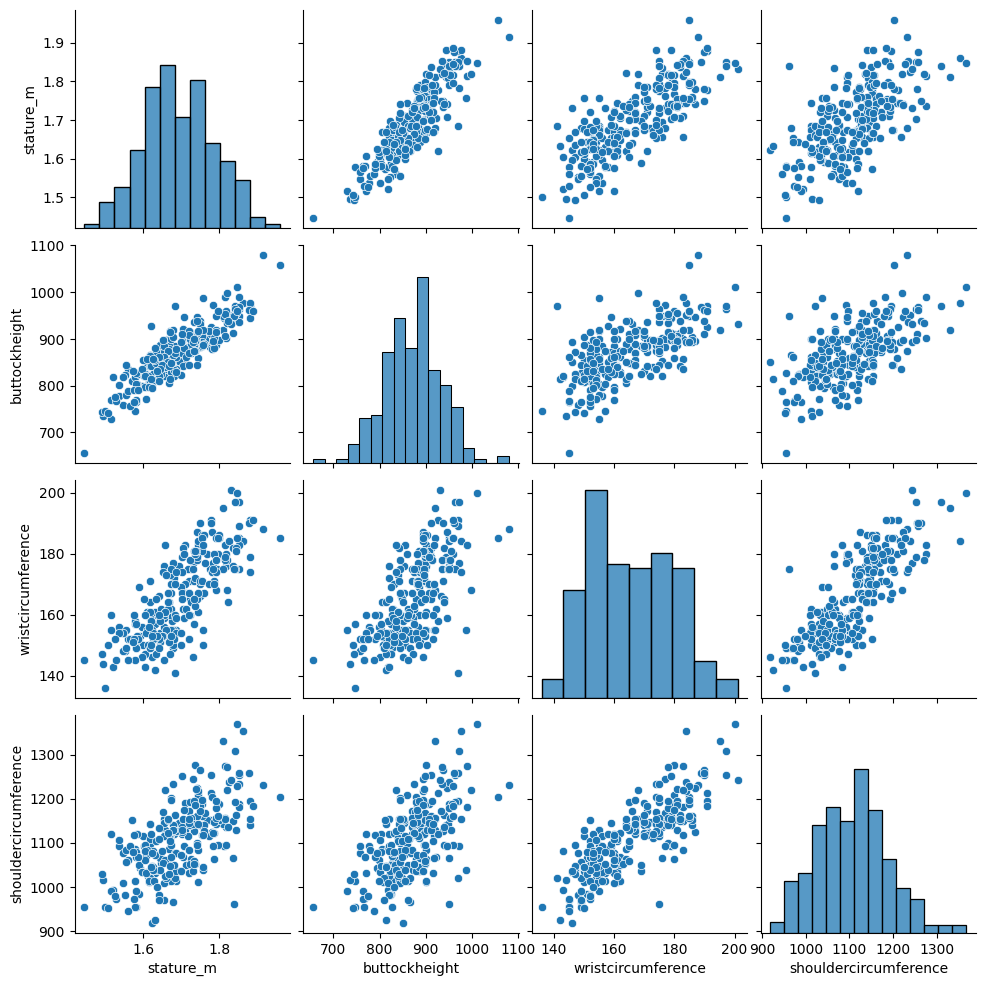

In [67]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_4feature_df)#you mean 4 feature, right? ansur_df has over 90 features

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

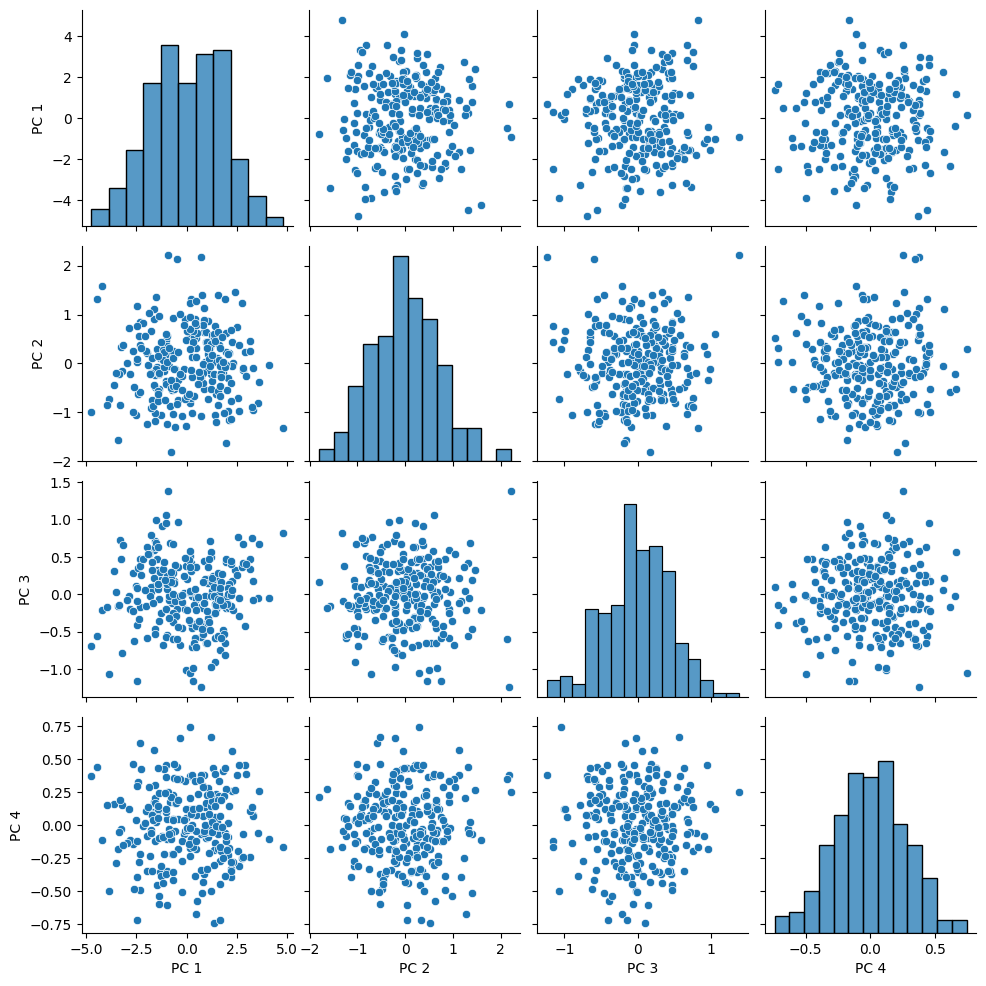

[0.80276423 0.12696401 0.05047644 0.01979531]


In [69]:
# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_4feature_df_std = scaler.fit_transform(ansur_4feature_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_4feature_df_std)

# This changes the numpy array output back to a DataFrame
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

In [70]:
print(pca.explained_variance_ratio_)

[0.80276423 0.12696401 0.05047644 0.01979531]


In [17]:

ansur_df = pd.concat([ansurm_df[:125], ansurf_df[:125]], ignore_index=True)

non_numeric = ["Branch", "Component", "Gender", "BMI_class", "Height_class"]
ansur_df_numeric = ansur_df.drop(non_numeric, axis=1)

X = ansur_df_numeric
y = ansur_df["Gender"]

In [19]:
X.shape

(250, 94)

<Axes: xlabel='PC 1', ylabel='PC 2'>

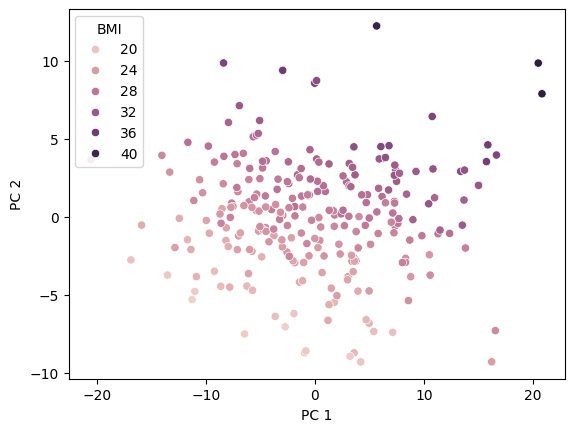

In [21]:
# Build the pipeline
pipe = Pipeline( [('scaler', StandardScaler()), ('reducer', PCA(n_components=2))])

#fit and transform
pc = pipe.fit_transform(X) #Error This 'Pipeline' has no attribute 'fit_transform'

#Add the principal components
ansur_df['PC 1'] = pc[:, 0]
ansur_df['PC 2'] = pc[:, 1]

sns.scatterplot(data=ansur_df, x='PC 1', y='PC 2', hue="BMI")

In [102]:
#modify pipeline
pipe = Pipeline([
('scaler', StandardScaler()),
('reducer', PCA(n_components=2)),
('classifier', RandomForestClassifier(random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
                
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

[0.57953748 0.13261343]
80.0% test set accuracy


In [103]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
('reducer', PCA(n_components=0.8))])
# Fit the pipe to the data: female dataset
pipe.fit(ansurf_df.drop(columns=["Branch", "Component", "Gender", "BMI_class", "Height_class"], axis=1))

print(f'{len(pipe["reducer"].components_)} components selected')

11 components selected


10 components selected


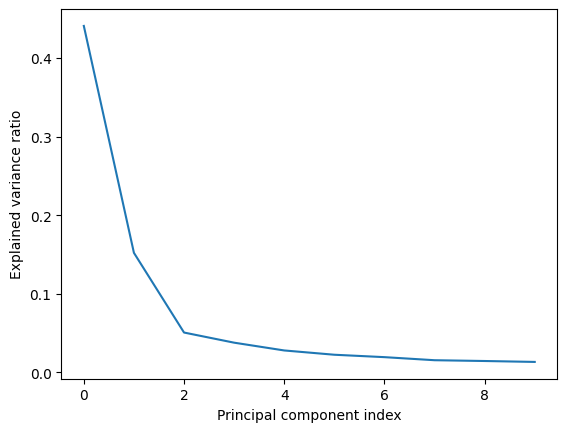

In [22]:

# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansurf_df.drop(columns=["Branch", "Component", "Gender", "BMI_class", "Height_class"], axis=1))

print(f'{len(pipe["reducer"].components_)} components selected')

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [104]:
#QUESTION: How many components can you reduce the dataset without compromising too much on explained variance? 
#Note that the x-axis is zero-indexed. Pick from options: (1, 2, 3, 4)
#We want to keep 2 + 1 components. We selectd 10, so we can drop 7.